In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import pandas as pd

In [115]:
df=pd.read_csv("bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [116]:
df.shape

(13320, 9)

In [117]:
df.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [118]:
df1=df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [119]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [120]:
df2=df1.dropna()

In [121]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [122]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [123]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(" ")[0]))

C:\Users\shikh\AppData\Local\Temp\ipykernel_6396\3547551536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(" ")[0]))


In [124]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [125]:
def is_float(x):
    try:
        float(x)
    except:
        return True
    return False
        

In [126]:
df2[df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [127]:
def convert_sqft_to_num(x):
    x=str(x)
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [128]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [129]:
convert_sqft_to_num('2850')

2850.0

In [130]:
convert_sqft_to_num('4125Perch')

In [131]:
df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)
df2.head(20)

C:\Users\shikh\AppData\Local\Temp\ipykernel_6396\1990087840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [132]:
df2.loc[648]

location        Arekere
size          9 Bedroom
total_sqft          NaN
bath                9.0
price             265.0
bhk                   9
Name: 648, dtype: object

In [133]:
df2=df2.dropna()

In [134]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [135]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [136]:
len(df2.location.unique())

1298

In [137]:
df2.location=df2.location.apply(lambda x: x.strip())

In [138]:
location_stats=df2.groupby('location')['location'].agg('count')
location_stats.head(50)

location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
1A Block Koramangala                                1
1Channasandra                                       1
1Hanuman Nagar                                      1
1Hoysalanagar                                       1
1Kasavanhalli                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layout                               8
1st Block Jayanagar                                14
1st Block Koramangala                              10
1st Phase JP Nagar                                 24
1st Stage Domlur                                    1
1st Stage Indira Nagar                              5
1st Stage Radha Kri

In [139]:
location_stats_less_11=location_stats[location_stats<=11]

In [140]:
df2['location']=df2['location'].apply(lambda x: 'other' if x in location_stats_less_11 else x)

In [141]:
len(df2.location.unique())

229

In [142]:
df2[df2.total_sqft/df2.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [143]:
df3=df2[df2.total_sqft/df2.bhk>300]
df3.shape

(12274, 7)

In [144]:
df3.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [145]:
df3.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [150]:
mean=df3.price_per_sqft.mean()
std=df3.price_per_sqft.std()
lower=mean-std
upper=mean+std
lower,upper

(2158.6654235861197, 10265.095037108927)

In [151]:
df4=df3[(df3.price_per_sqft>lower) & (df3.price_per_sqft<=upper)]
df4.shape

(11167, 7)

In [152]:
df4.price_per_sqft.describe()

count    11167.000000
mean      5335.420181
std       1624.542652
min       2159.090909
25%       4111.460296
50%       5066.666667
75%       6321.243523
max      10263.157895
Name: price_per_sqft, dtype: float64

In [159]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 bhk')
    plt.xlabel("total square feet area")
    plt.ylabel("price")
    plt.legend()

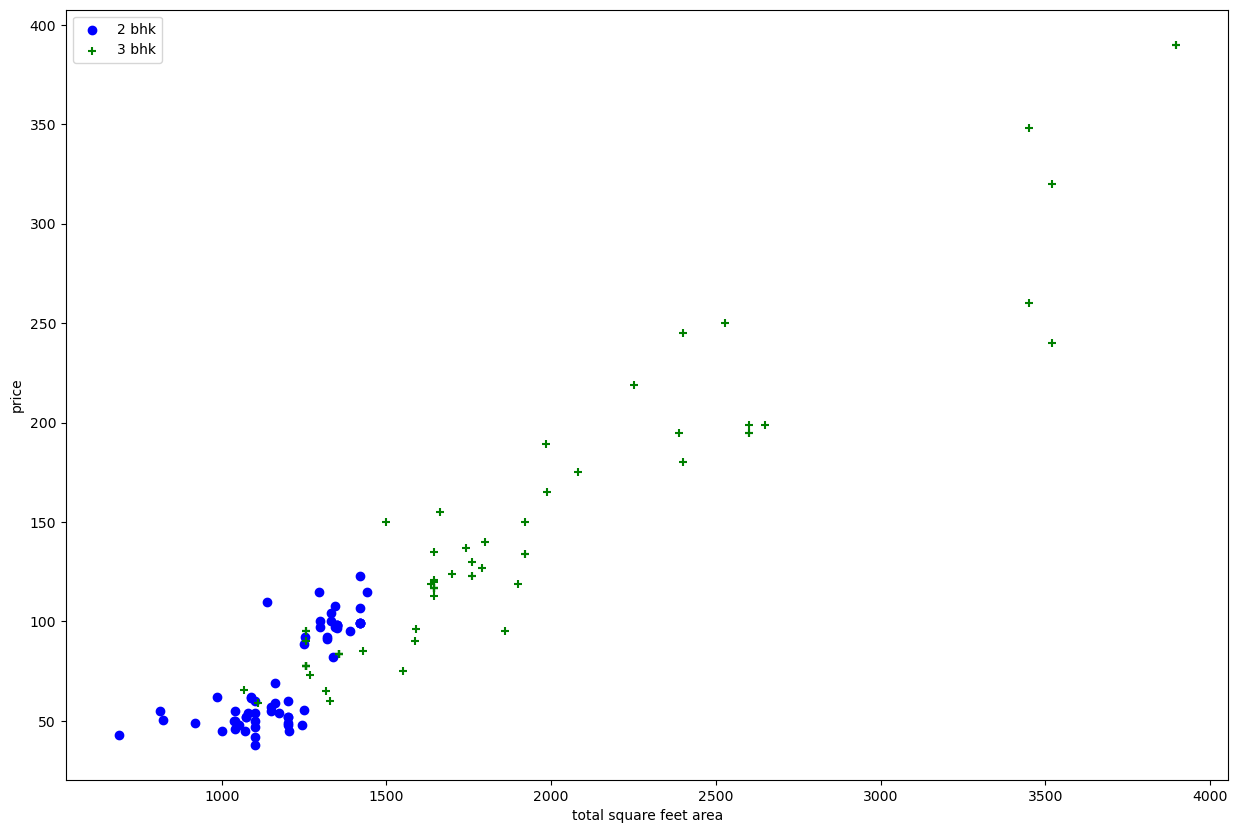

In [173]:
plot_scatter_chart(df4,"Hebbal")

In [174]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
    

In [175]:
df5=remove_bhk_outliers(df4)
df5.shape

(7935, 7)

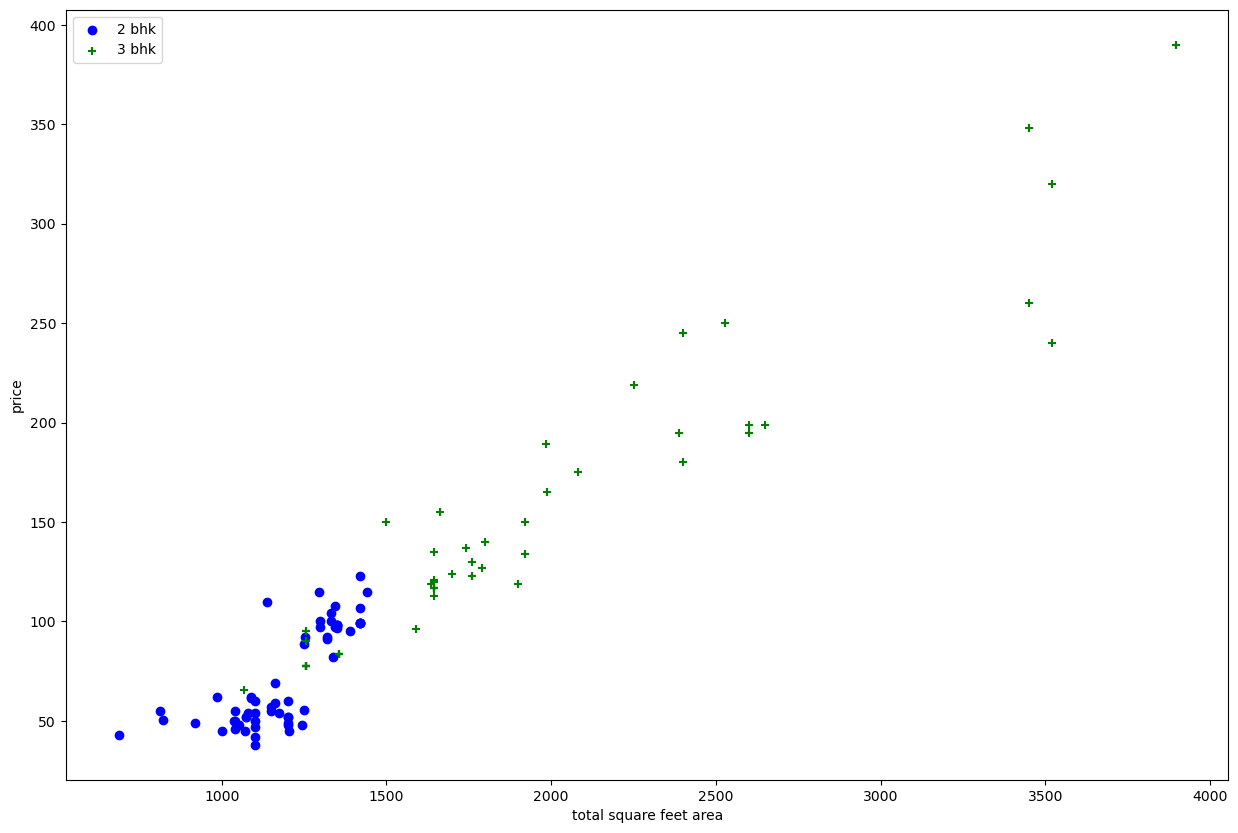

In [176]:
plot_scatter_chart(df5,"Hebbal")

Text(0, 0.5, 'count')

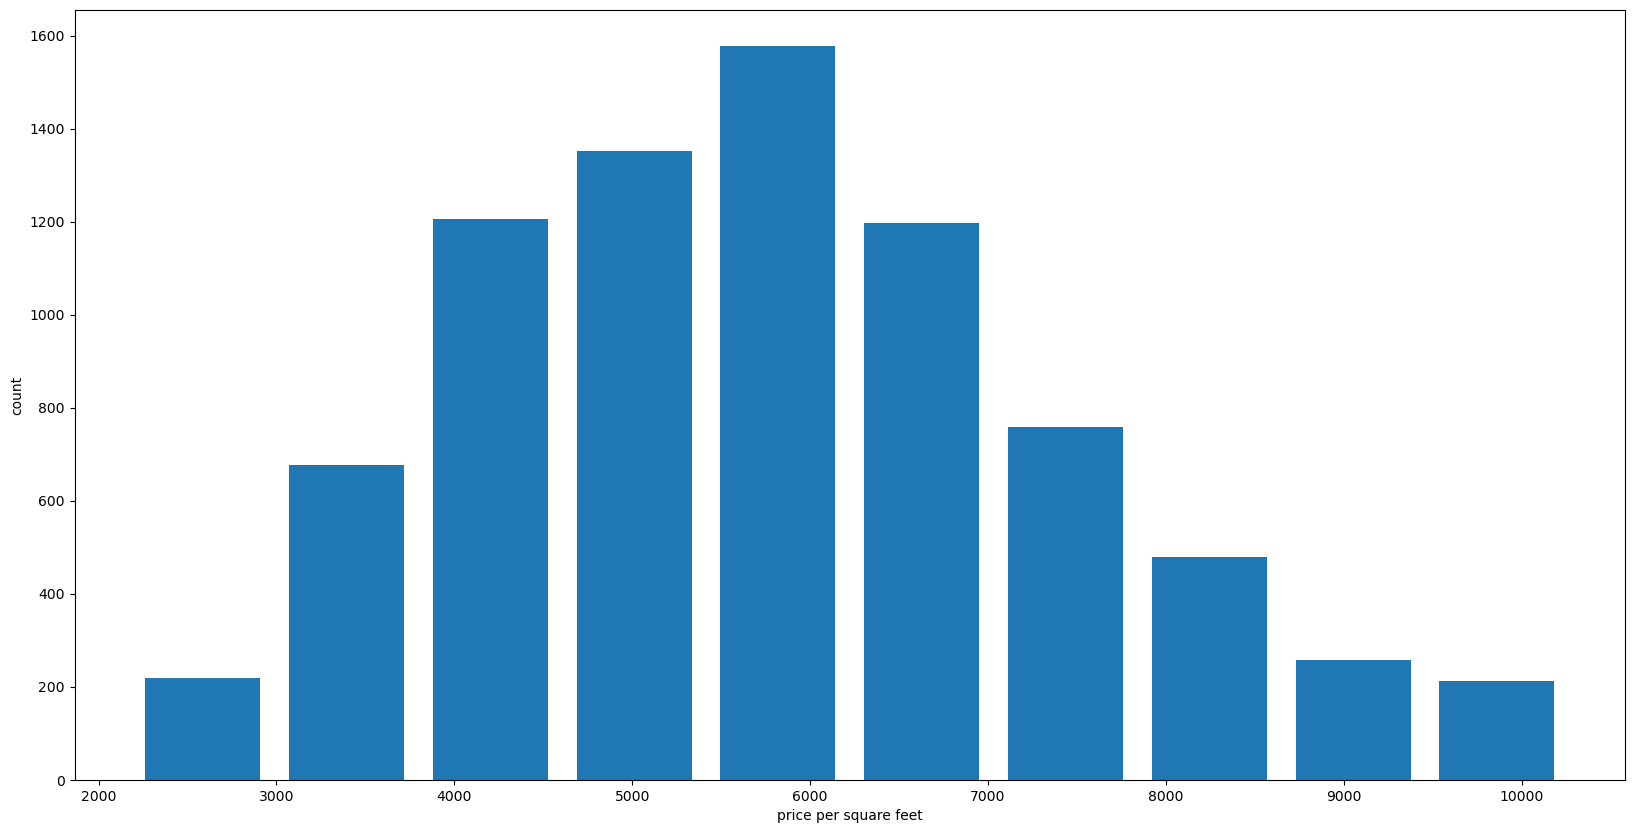

In [178]:
plt.figure(figsize=(20,10))
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'number of bathrooms')

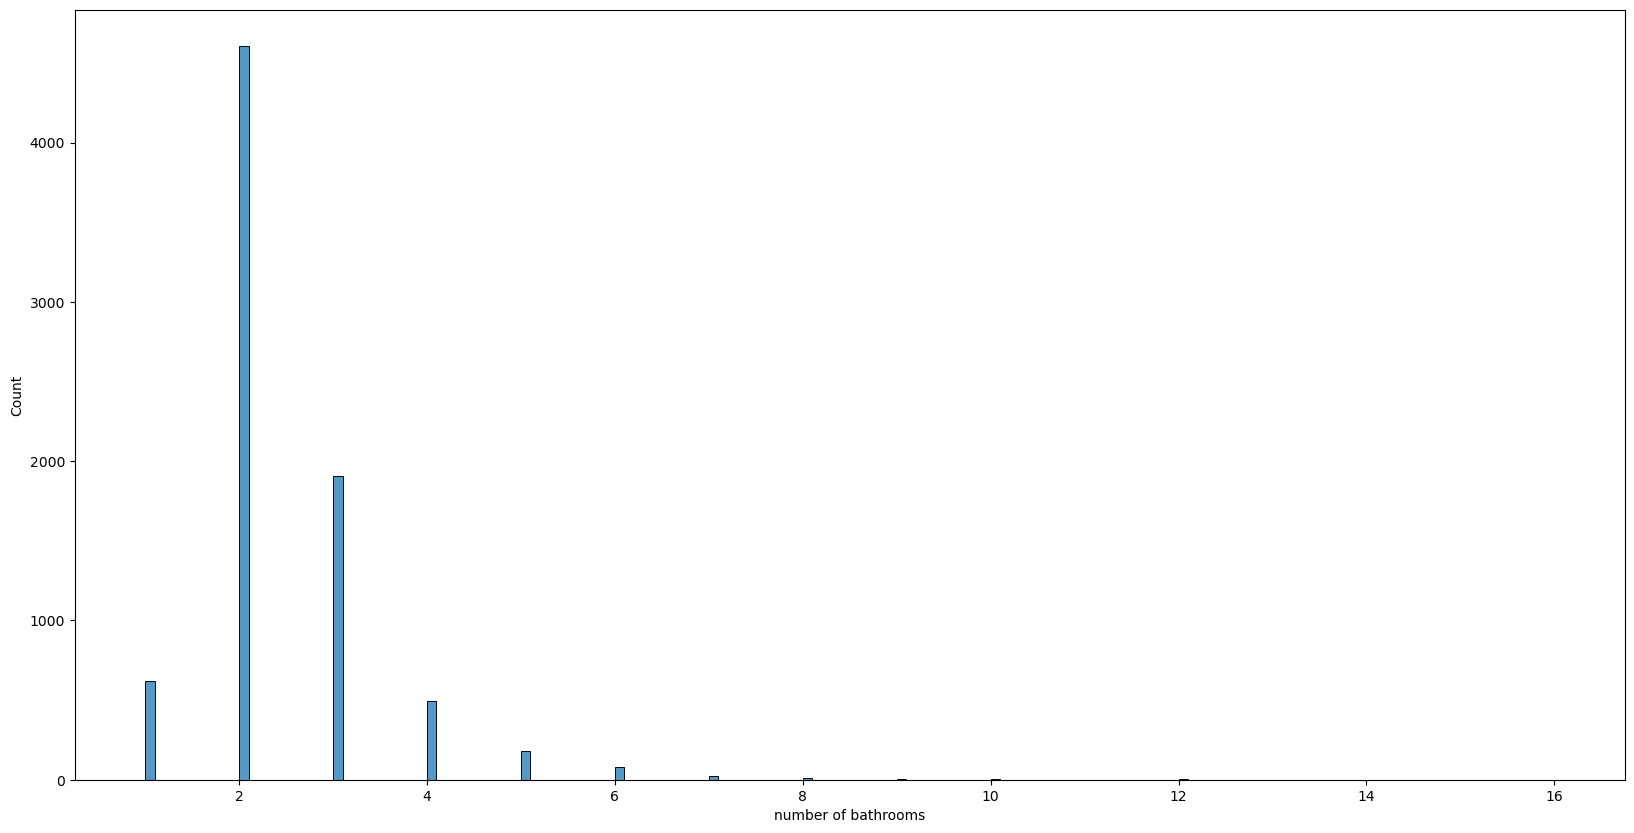

In [214]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.histplot(df5.bath)
plt.xlabel("number of bathrooms")

In [215]:
outlier=df5[df5.bath>df5.bhk+2].index
df6=df5.drop(outlier,axis=0)

In [216]:
df6.shape

(7931, 7)

In [217]:
dummies=pd.get_dummies(df6.location).astype(int)
dummies.head(20)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
df7=pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
df8=df7.drop(['location','size'],axis='columns')
df8.head()

,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,7467.057101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
x=df8.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,3699.810606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,4305.555556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,6245.890861,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,4250.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,4,7467.057101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
y=df8.price

In [222]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [223]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.9605340017317539

In [224]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([ 9.53327874e-01,  9.60378617e-01,  9.55606376e-01,  9.48327703e-01,
       -4.63548939e+13])

In [225]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearch(x,y):
    algos={
        'linear_regression': {
            'model':LinearRegression(),
            'params': {
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params': {
                 'alpha':[1,2],
                 'selection': ['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params': {
                 'criterion':['mse','friedam_mse'],
                 'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for alo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
            
            

In [226]:
find_best_model_using_gridsearch(x,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [227]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearch(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # 'mse' is now 'squared_error' in newer versions
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage:
# best_model_results = find_best_model_using_gridsearch(X_train, y_train)


In [228]:
find_best_model_using_gridsearch(x,y)

,model,best_score,best_params
0,linear_regression,0.955212,"{'fit_intercept': True, 'positive': True}"
1,lasso,0.955445,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.986058,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [231]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    z=np.zeros(len(x.columns))
    z[0]=sqft
    z[1]=bath
    z[2]=bhk
    if loc_index>=0:
        z[loc_index]=1
    return reg.predict([z])[0]

In [232]:
predict_price("1st Phase JP Nagar",1000,2,2)

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-43.9112954465749

In [233]:
predict_price("Indira Nagar",1000,2,2)

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-48.88289297729328

In [234]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(reg,f)

In [235]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open ("columns.json","w") as f:
    f.write(json.dumps(columns))